contents: 
1: EDA and plotting (4 insights - refer EDA-part-1.docx) 
2: Pandas Profiling (visualization - no insights)

To be done: 
1. Add Insights
3. Quality Assessmnt
4. validation w/ GreatExpectations
5. CodeLabs and Host tool in StreamLit.


In [ ]:
import pandas as pd
ds = '/KPMG_VI_New_raw_data_update_final.xlsx'

df = pd.read_excel(ds, sheet_name= 'Transactions', header=1)
df.describe()



transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

In [ ]:

row_count = df.shape[0]
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 20000


In [ ]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
pip install plotnine


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from plotnine import *


In [ ]:
columns = df.columns
print(columns)

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')


In [ ]:
column_types = df.dtypes
print(column_types)

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object




---

Checking object attributes for accuracy i.e. check unique values and NaNs

---



In [ ]:
#for each column, check - a) correct values (accuracy)

#checking order_status
unique_values_OS = df["order_status"].unique()
print("unique values -- order status ---", unique_values_OS)

#checking brand
unique_values_brand = df["brand"].unique()
print("unique values -- brand ---", unique_values_brand)

#checking NaN count in brand
nan_count_brand = df["brand"].isna().sum()
print("missing values in the brand column:", nan_count_brand)

#checking product_line
unique_values_PL = df["product_line"].unique()
print("unique values -- product line ---", unique_values_PL)

#checking NaN count in product_line
nan_count_pl = df["product_line"].isna().sum()
print("missing values in the product_line column:", nan_count_pl)

#checking product_class
unique_values_pc = df["product_class"].unique()
print("unique values -- product_class ---", unique_values_pc)

#checking NaN count in product_class
nan_count_pc = df["product_class"].isna().sum()
print("missing values in the product_class column:", nan_count_pc)

#checking product_size
unique_values_ps = df["product_size"].unique()
print("unique values -- product_size ---", unique_values_ps)

#checking NaN count in product_size
nan_count_ps = df["product_size"].isna().sum()
print("missing values in the product_size column:", nan_count_ps)



unique values -- order status --- ['Approved' 'Cancelled']
unique values -- brand --- ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
missing values in the brand column: 197
unique values -- product line --- ['Standard' 'Road' 'Mountain' 'Touring' nan]
missing values in the product_line column: 197
unique values -- product_class --- ['medium' 'low' 'high' nan]
missing values in the product_class column: 197
unique values -- product_size --- ['medium' 'large' 'small' nan]
missing values in the product_size column: 197


In [ ]:

# instances where values in the order_status column == §approved§ and other details like class and size are NaN -- probable invalid transactions
inv_trans = df[(df["order_status"] == "Approved") & (df["product_size"].isna()) & (df["product_class"].isna()) & (df["product_line"].isna()) & (df["brand"].isna())][:15]


#Get the count
count = inv_trans.shape[0]
print("Number of transactions with order status approved and product details not available :", count)


Number of transactions with order status approved and product details not available : 15


In [ ]:
probable_invalid_transactions = inv_trans[["customer_id", "product_id", "transaction_id"]]

# Print the columns
print(probable_invalid_transactions)


      customer_id  product_id  transaction_id
136           431           0             137
159          3300           0             160
366          1614           0             367
406          2559           0             407
676          2609           0             677
780           897           0             781
1130         2163           0            1131
1196         2234           0            1197
1282          397           0            1283
1653         1972           0            1654
1680         2733           0            1681
1752          925           0            1753
1778         2153           0            1779
2186         1568           0            2187
2302         2465           0            2303


In [ ]:

# instances where values in the order_status column == §Cancelled§ -- cancelled transactions 
cancelled_trans = df[(df["order_status"] == "Cancelled") & (df["product_size"].isna()) & (df["product_class"].isna()) & (df["product_line"].isna()) & (df["brand"].isna())][:15]


#Get the count
count_ct = cancelled_trans.shape[0]
print("Number of transactions with order status cancelled and product details not available :", count_ct)



Number of transactions with order status cancelled and product details not available : 1


In [ ]:
demographic_cust = pd.read_excel(ds, sheet_name= 'CustomerDemographic', header=0)
demographic_cust.describe()

<ipython-input-15-addb9f0a524c>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})


customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  3999.000000   
mean   2000.500000                            48.890000    44.054514   
std    1154.844867                            28.715005    16.858429   
min       1.000000                             0.000000    18.000000   
25%    1000.750000                            24.000000    33.000000   
50%    2000.500000                            48.000000    43.000000   
75%    3000.250000                            73.000000    53.000000   
max    4000.000000                            99.000000   120.000000   

            tenure  
count  3913.000000  
mean     10.657041  
std       5.660146  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000

In [ ]:
col_types = demographic_cust.dtypes
print(col_types)

customer_id                                     int64
name                                           object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
age                                           float64
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
dtype: object


In [ ]:

# Merge
merged_df = demographic_cust.merge(inv_trans[['customer_id']], on='customer_id', how='inner')

# Get the desired columns
referenced = merged_df[['name', 'customer_id', 'DOB','deceased_indicator']]

# Print the ids that could be referenced back to cust_dem table
print(referenced)
print("Result count:", referenced.shape[0])

                   name  customer_id        DOB deceased_indicator
0             Gale Done          431 1956-03-26                  N
1   Quintus Gouldthorpe         3300 1961-05-22                  N
2        Genvieve Kobes         2609 1964-12-18                  N
3            Pris Fance          897 1969-01-11                  N
4        Fulvia Bernini         2559 1969-06-21                  N
5       Nicko Pembridge          925 1978-08-07                  N
6       Bellanca Strutz         1568 1980-05-23                  N
7         Nerissa Foote          397 1981-09-02                  N
8         Currie Gimber         1614 1984-08-12                  N
9         Paloma Nilles         2465 1984-06-12                  N
10       Jordanna Skyme         2733 1985-03-07                  N
11               Jimmy          2153 1986-10-13                  N
12         Dylan Hanvey         2234 1986-09-09                  N
13          Obed Pauler         1972 1989-07-14               

In [ ]:
# Find the count of customer IDs in Table 1 that are not present in Table 2 -- checking for possible fraud

not_present = inv_trans[~inv_trans["customer_id"].isin(demographic_cust["customer_id"])].shape[0]
print("Count of customer IDs in invalid_transactions that could not be referenced in demographic_cust:", not_present)

Count of customer IDs in Table 1 not present in Table 2: 0


In [ ]:
#inventory mismanagement rate 
 
referenced.shape[0]/row_count

0.00075

Female    2039
Male      1873
U           88
Name: gender, dtype: int64
Range of DOB column: 1843-12-21 00:00:00 to 2002-03-11 00:00:00
Number of dates below year 1920: 1
--------
   customer_id               name gender  past_3_years_bike_related_purchases  \
0           34  Jephthah Bachmann      U                                   59   

         DOB  age        job_title job_industry_category     wealth_segment  \
0 1843-12-21  NaN  Legal Assistant                    IT  Affluent Customer   

  deceased_indicator owns_car  tenure age_range  
0                  N       No    20.0       NaN  
--------
missing values in the DOB column: 87
------------------------------------------


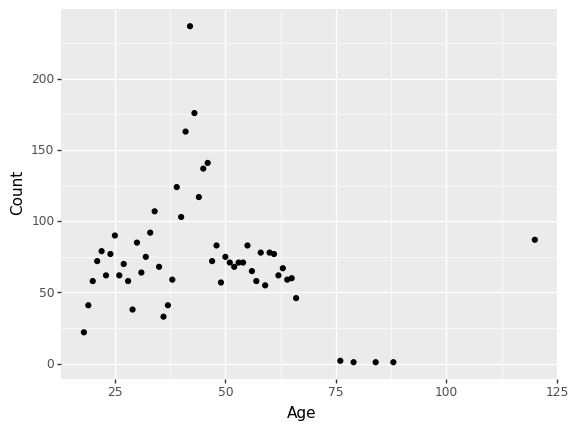


-----------------------------------------
age_range
0-25       501
25-50     2337
50-75     1069
75-100       5
Name: age_range, dtype: int64


In [ ]:
#--- CHECKING OBJ TYPES IN demographic_cust table ---


#checking gender
unique_value_counts_gender = demographic_cust["gender"].value_counts()
print(unique_value_counts_gender)

#checking range of DOB
min_dob = demographic_cust['DOB'].min()
max_dob = demographic_cust['DOB'].max()
print("Range of DOB column:", min_dob, "to", max_dob)


# Count the number of dates below year 1920
DOB_count_below_1920 = demographic_cust["DOB"]
count_below_1920 = (DOB_count_below_1920.dt.year < 1920).sum()
print("Number of dates below year 1920:", count_below_1920)
print("--------")
# Filter the rows containing values below the year 1920
filtered_df_DOB_flag = demographic_cust[demographic_cust["DOB"].dt.year < 1920]
print(filtered_df_DOB_flag)

#Customer_ID 34 has 59 purchases in the last 3 years; so YOB cannot be 1843. 


#checking NaN count in DOB
print("--------")
nan_count_DOB = demographic_cust["DOB"].isna().sum()
print("missing values in the DOB column:", nan_count_DOB)

#Checking age
# Plot the scatter plot of the Age column
age_column = demographic_cust.groupby('age').size().reset_index(name='count')

print("------------------------------------------")
# Plot the scatter plot using plotnine
print(ggplot(age_column, aes(x='age', y='count')) + 
 geom_point() + 
 labs(x='Age', y='Count'))
print("-----------------------------------------")


demographic_cust['age_range'] = pd.cut(demographic_cust['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '25-50', '50-75', '75-100'])
age_range_counts = demographic_cust.groupby(['age_range'])['age_range'].count()
print(age_range_counts)


print("-----------------------------------------")




unique values -- job_industry_category --- ['IT' 'Health' 'Financial Services' 'Manufacturing' 'Retail' 'Property'
 nan 'Entertainment' 'Agriculture' 'Telecommunications']
------------------------------------------


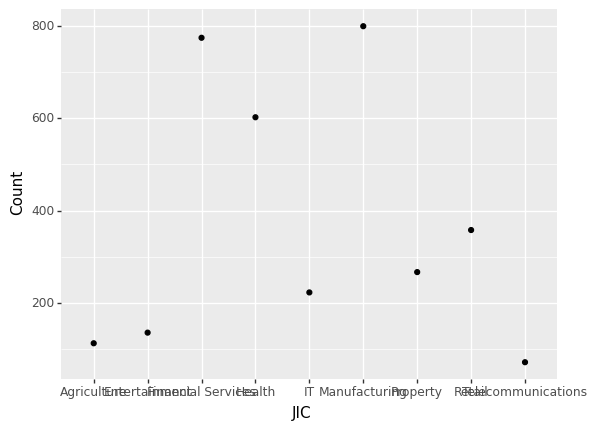


-----------------------------------------


In [ ]:
#checking industry category

#checking JIC
unique_values_jic = demographic_cust["job_industry_category"].unique()
print("unique values -- job_industry_category ---", unique_values_jic)


#Checking age
# Plot the scatter plot of the JIC column
jic_column = demographic_cust.groupby('job_industry_category').size().reset_index(name='count')

print("------------------------------------------")
print(ggplot(jic_column, aes(x='job_industry_category', y='count')) + 
 geom_point() + 
 labs(x='JIC', y='Count'))
print("-----------------------------------------")



unique values -- wealth_segment --- ['Affluent Customer' 'Mass Customer' 'High Net Worth']
------------------------------------------


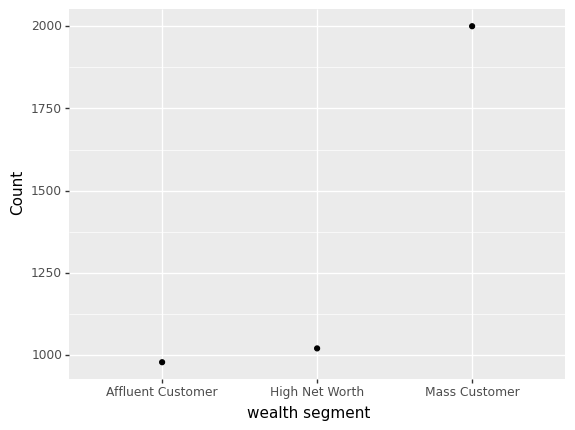


-----------------------------------------
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


In [ ]:
#checking wealth_segment

#checking wealth_segment
unique_values_ws = demographic_cust["wealth_segment"].unique()
print("unique values -- wealth_segment ---", unique_values_ws)


#Checking age
# Plot the scatter plot of the wealth_segment column
wealth_segment_column = demographic_cust.groupby('wealth_segment').size().reset_index(name='count')

print("------------------------------------------")
print(ggplot(wealth_segment_column, aes(x='wealth_segment', y='count')) + 
 geom_point() + 
 labs(x='wealth segment', y='Count'))
print("-----------------------------------------")

counts = demographic_cust['wealth_segment'].value_counts()
print(counts)


In [ ]:

#checking deceased indicator
unique_values_di = demographic_cust["deceased_indicator"].unique()
print("unique values -- deceased_indicator ---", unique_values_di)

#checking owns_car

unique_values_oc = demographic_cust["deceased_indicator"].unique()
print("unique values -- deceased_indicator ---", unique_values_oc)


unique values -- deceased_indicator --- ['N' 'Y']
unique values -- deceased_indicator --- ['N' 'Y']


In [ ]:
pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
ds = '/KPMG_VI_New_raw_data_update_final.xlsx'

df_t = pd.read_excel(ds, sheet_name= 'Transactions', header=1)

df_t.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

In [ ]:
pip install -U ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 24.4 MB/s eta 0:00:00
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 0.0.dev0
    Uninstalling ydata-profiling-0.0.dev0:
      Successfully uninstalled ydata-profiling-0.0.dev0


In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
#pandas profiling transactions dataset
profile = ProfileReport(df_t, title="Pandas Profiling Report")


In [ ]:
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
ds = '/KPMG_VI_New_raw_data_update_final.xlsx'

df_CD = pd.read_excel(ds, sheet_name= 'CustomerDemographic', header=0)

df_CD.describe()





<ipython-input-8-213c34c7db6c>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_CD = pd.read_excel(ds, sheet_name= 'CustomerDemographic', header=0)


customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  3999.000000   
mean   2000.500000                            48.890000    44.054514   
std    1154.844867                            28.715005    16.858429   
min       1.000000                             0.000000    18.000000   
25%    1000.750000                            24.000000    33.000000   
50%    2000.500000                            48.000000    43.000000   
75%    3000.250000                            73.000000    53.000000   
max    4000.000000                            99.000000   120.000000   

            tenure  
count  3913.000000  
mean     10.657041  
std       5.660146  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000

In [ ]:
#Pandas profiling customer demographic dataset
profile = ProfileReport(df_CD, title="Pandas Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
ds = '/KPMG_VI_New_raw_data_update_final.xlsx'

df_CA = pd.read_excel(ds, sheet_name= 'CustomerAddress', header=1)

df_CA.describe()

customer_id     postcode  property_valuation
count  3999.000000  3999.000000         3999.000000
mean   2003.987997  2985.755939            7.514379
std    1154.576912   844.878364            2.824663
min       1.000000  2000.000000            1.000000
25%    1004.500000  2200.000000            6.000000
50%    2004.000000  2768.000000            8.000000
75%    3003.500000  3750.000000           10.000000
max    4003.000000  4883.000000           12.000000

In [ ]:
#Pandas profiling customer demographic dataset
profile = ProfileReport(df_CA, title="Pandas Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pip install ydata_quality

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.4
    Uninstalling pydantic-1.10.4:
      Successfully uninstalled pydantic-1.10.4
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: p

In [ ]:

from ydata_quality import DataQuality
import pandas as pd


In [ ]:
import pandas as pd
ds = '/KPMG_VI_New_raw_data_update_final.xlsx'

df_t = pd.read_excel(ds, sheet_name= 'Transactions', header=1)

df_t.describe()

transaction_id   product_id   customer_id  online_order    list_price  \
count    20000.000000  20000.00000  20000.000000  19640.000000  20000.000000   
mean     10000.500000     45.36465   1738.246050      0.500458   1107.829449   
std       5773.647028     30.75359   1011.951046      0.500013    582.825242   
min          1.000000      0.00000      1.000000      0.000000     12.010000   
25%       5000.750000     18.00000    857.750000      0.000000    575.270000   
50%      10000.500000     44.00000   1736.000000      1.000000   1163.890000   
75%      15000.250000     72.00000   2613.000000      1.000000   1635.300000   
max      20000.000000    100.00000   5034.000000      1.000000   2091.470000   

       standard_cost  product_first_sold_date  
count   19803.000000             19803.000000  
mean      556.046951             38199.776549  
std       405.955660              2875.201110  
min         7.210000             33259.000000  
25%       215.140000             35667.000000  
50%       507.580000             38216.000000  
75%       795.100000             40672.000000  
max      1759.850000             42710.000000

In [ ]:
pip install ydata-quality


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(df_t.dtypes)

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date             int64
dtype: object


In [ ]:
from ydata_quality import DataQuality
import pandas as pd


# create a DataQuality object from the main class that holds all quality modules
dq = DataQuality(df=df_t)

# run the tests and outputs a summary of the quality tests
results = dq.evaluate()

TypeError: ignored